In [61]:
import numpy as np
import os
import pandas as pd
import pickle

import random

def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

seed_everything(1)

import plotly.express as px
import plotly.graph_objects as go
from matplotlib.pyplot import figure

In [2]:
import scipy.spatial
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram 

In [3]:
# 유사도 측정 및 거리행렬 
with open('data\matrix.pickle', 'rb') as f:
    matrix = pickle.load(f)

In [25]:
party_to_color = {'국민의힘':'red', '더불어민주당':'blue','한국의희망':'orange', '열린민주당':'blue','국민의당':'#EA5504',
                  '정의당':'yellow','무소속':'gray','시대전환':'purple','진보당':'green','기본소득당':'skyblue'}

In [5]:
afro_committees = ['김승남', '윤준병', '홍문표', '신정훈', '최춘식', '윤미향', '이양수', '이달곤', '안호영', '주철현', '위성곤', '어기구', '박덕흠', '안병길', '윤재갑', '소병훈', '이원택', '서삼석', '정희용']
color_to_committees = {'green': afro_committees}

In [71]:
diagonal = []
for x in matrix.index:
    diagonal.append(matrix.loc[x,x])

In [80]:
nomalized_matrix = matrix.div(diagonal, axis = 0)

In [89]:
## mds : 다차원 척도법 시각화

def mds2D(matrix):
    
    distanceMatrix  = scipy.spatial.distance.pdist(matrix ,metric = 'cosine')
    distanceMatrix  = scipy.spatial.distance.squareform(distanceMatrix)

    matrix_embedded = MDS(n_components=2, random_state=1,dissimilarity='precomputed', eps = 0).fit_transform(distanceMatrix)
    matrix_embedded = pd.DataFrame(matrix_embedded, columns = ['x1','x2'])
    matrix_embedded['name'] = [x.split(' ')[0] for x in  matrix.index]
    matrix_embedded['party'] = [x.split(' ')[1] for x in  matrix.index]
    matrix_embedded['color'] = [party_to_color[x] for x in matrix_embedded['party']]
    
    fig = go.Figure()
    for party in list(set(matrix_embedded['party'])):
        matrix_party =  matrix_embedded[matrix_embedded['party'] == party]
        fig.add_trace(go.Scatter(x=matrix_party['x1'],
                                 y=matrix_party['x2'],
                                 mode='markers',
                                 marker_color = matrix_party['color'],
                                 text=matrix_party['name'],
                                 name=party))
    fig.show()
    

In [91]:
mds2D(matrix)

In [92]:
import umap

In [100]:
def Umap2D(matrix):
    
    reducer = umap.UMAP(random_state=42)
    
    distanceMatrix  = scipy.spatial.distance.pdist(matrix ,metric = 'cosine')
    distanceMatrix  = scipy.spatial.distance.squareform(distanceMatrix)

    matrix_embedded = reducer.fit_transform(matrix)
    matrix_embedded = pd.DataFrame(matrix_embedded, columns = ['x1','x2'])
    matrix_embedded['name'] = [x.split(' ')[0] for x in  matrix.index]
    matrix_embedded['party'] = [x.split(' ')[1] for x in  matrix.index]
    matrix_embedded['color'] = [party_to_color[x] for x in matrix_embedded['party']]
    
    fig = go.Figure()
    for party in list(set(matrix_embedded['party'])):
        matrix_party =  matrix_embedded[matrix_embedded['party'] == party]
        fig.add_trace(go.Scatter(x=matrix_party['x1'],
                                 y=matrix_party['x2'],
                                 mode='markers',
                                 marker_color = matrix_party['color'],
                                 text=matrix_party['name'],
                                 name=party))
    fig.show()

In [101]:
Umap2D(matrix)

In [98]:
# 워드 클라우드

from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt

class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
    
def DrawPointColoredWC(tags,title,cwd,topic, drop_list=[], color = '#00ff00', pointed_list=[]):
    color_to_words = {
        color : pointed_list
    }

    use_tags = tags.drop(drop_list, errors = 'ignore')
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun',background_color="white",width=1600, height=800,random_state = 1)

    default_color = 'black'
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)

    cloud = wc.generate_from_frequencies(dict(use_tags))
    wc.recolor(color_func=grouped_color_func)

    figure(dpi=1200)
    figure(figsize=[12,8])
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.savefig(cwd + '/' + topic + '/'+ title + ' 강조'+'.pdf')
    plt.show()

丁慶姬       全惠淑       全海澈       全珠惠       兪京濬       兪義東       兪訂炷  \
丁慶姬  0.000000  0.782347  0.845358  0.176549  0.292407  0.400619  0.871366   
全惠淑  0.782347  0.000000  0.279825  0.754175  0.841779  0.833926  0.310825   
全海澈  0.845358  0.279825  0.000000  0.821424  0.896201  0.878283  0.376433   
全珠惠  0.176549  0.754175  0.821424  0.000000  0.266651  0.413863  0.844829   
兪京濬  0.292407  0.841779  0.896201  0.266651  0.000000  0.396906  0.919235   
..        ...       ...       ...       ...       ...       ...       ...   
林五卿  0.821921  0.306363  0.349984  0.798025  0.878800  0.860379  0.310946   
林昊宣  0.896731  0.340823  0.413198  0.871577  0.939670  0.926836  0.325926   
林炳憲  0.276527  0.835509  0.895754  0.345258  0.285613  0.422891  0.915334   
林鍾聲  0.853809  0.278773  0.282499  0.834164  0.906615  0.870791  0.278054   
林利子  0.348320  0.840567  0.890964  0.335713  0.313023  0.425063  0.913665   

          具滋根       千俊鎬       南仁順  ...       李鍾成        李鏞       李亮壽  \
丁慶姬  0.411424  0.873698  0.847321  ...  0.407917  0.312754  0.163950   
全惠淑  0.873560  0.228836  0.242396  ...  0.864316  0.834704  0.707078   
全海澈  0.920846  0.325015  0.318857  ...  0.918072  0.887382  0.776936   
全珠惠  0.365215  0.857508  0.819776  ...  0.422099  0.272310  0.228183   
兪京濬  0.310482  0.931111  0.898823  ...  0.331332  0.260469  0.235560   
..        ...       ...       ...  ...       ...       ...       ...   
林五卿  0.906531  0.311245  0.362649  ...  0.905088  0.868389  0.755834   
林昊宣  0.957549  0.334549  0.347276  ...  0.951189  0.927895  0.834554   
林炳憲  0.331956  0.927693  0.895337  ...  0.280007  0.353136  0.286158   
林鍾聲  0.929724  0.300445  0.330183  ...  0.929780  0.896540  0.788312   
林利子  0.232738  0.925037  0.894194  ...  0.268298  0.300755  0.294529   

          李龍彬       李龍雨       林五卿       林昊宣       林炳憲       林鍾聲       林利子  
丁慶姬  0.871251  0.837171  0.821921  0.896731  0.276527  0.853809  0.348320  
全惠淑  0.337516  0.295812  0.306363  0.340823  0.835509  0.278773  0.840567  
全海澈  0.362721  0.333001  0.349984  0.413198  0.895754  0.282499  0.890964  
全珠惠  0.854870  0.810545  0.798025  0.871577  0.345258  0.834164  0.335713  
兪京濬  0.922282  0.892535  0.878800  0.939670  0.285613  0.906615  0.313023  
..        ...       ...       ...       ...       ...       ...       ...  
林五卿  0.359992  0.351031  0.000000  0.414560  0.876520  0.289038  0.876066  
林昊宣  0.343890  0.401186  0.414560  0.000000  0.937494  0.291668  0.934934  
林炳憲  0.918105  0.891680  0.876520  0.937494  0.000000  0.905473  0.317798  
林鍾聲  0.322795  0.350250  0.289038  0.291668  0.905473  0.000000  0.901740  
林利子  0.914502  0.888057  0.876066  0.934934  0.317798  0.901740  0.000000  

[300 rows x 300 columns]

In [158]:
# 기준이 되는 사람 선정
person = '李在明'

In [157]:
name_party_dict

{'李周桓': ['이주환', '국민의힘'],
 '具滋根': ['구자근', '국민의힘'],
 '金用判': ['김용판', '국민의힘'],
 '金學容': ['김학용', '국민의힘'],
 '金熙坤': ['김희곤', '국민의힘'],
 '白宗憲': ['백종헌', '국민의힘'],
 '安炳吉': ['안병길', '국민의힘'],
 '李仁善': ['이인선', '국민의힘'],
 '李憲昇': ['이헌승', '국민의힘'],
 '田奉珉': ['전봉민', '국민의힘'],
 '許垠娥': ['허은아', '국민의힘'],
 '權性東': ['권성동', '국민의힘'],
 '金英植': ['김영식', '국민의힘'],
 '金雄': ['김웅', '국민의힘'],
 '朴成重': ['박성중', '국민의힘'],
 '徐一俊': ['서일준', '국민의힘'],
 '鄭東萬': ['정동만', '국민의힘'],
 '崔英姬': ['최영희', '국민의힘'],
 '河泰慶': ['하태경', '국민의힘'],
 '李龍彬': ['이용빈', '더불어민주당'],
 '金炳旭': ['김병욱', '더불어민주당'],
 '文貞福': ['문정복', '더불어민주당'],
 '閔炳德': ['민병덕', '더불어민주당'],
 '李介昊': ['이개호', '더불어민주당'],
 '李炳勳': ['이병훈', '더불어민주당'],
 '李庸瑄': ['이용선', '더불어민주당'],
 '鄭泰浩': ['정태호', '더불어민주당'],
 '曺五燮': ['조오섭', '더불어민주당'],
 '韓秉道': ['한병도', '더불어민주당'],
 '孟聖奎': ['맹성규', '더불어민주당'],
 '金敏基': ['김민기', '더불어민주당'],
 '金承南': ['김승남', '더불어민주당'],
 '閔洪喆': ['민홍철', '더불어민주당'],
 '徐東榕': ['서동용', '더불어민주당'],
 '李素永': ['이소영', '더불어민주당'],
 '張喆敏': ['장철민', '더불어민주당'],
 '崔仁昊': ['최인호', '더불어민주당'],
 '許榮': ['허영', '더불어민주당'],
 '許琮植': ['허종식', 

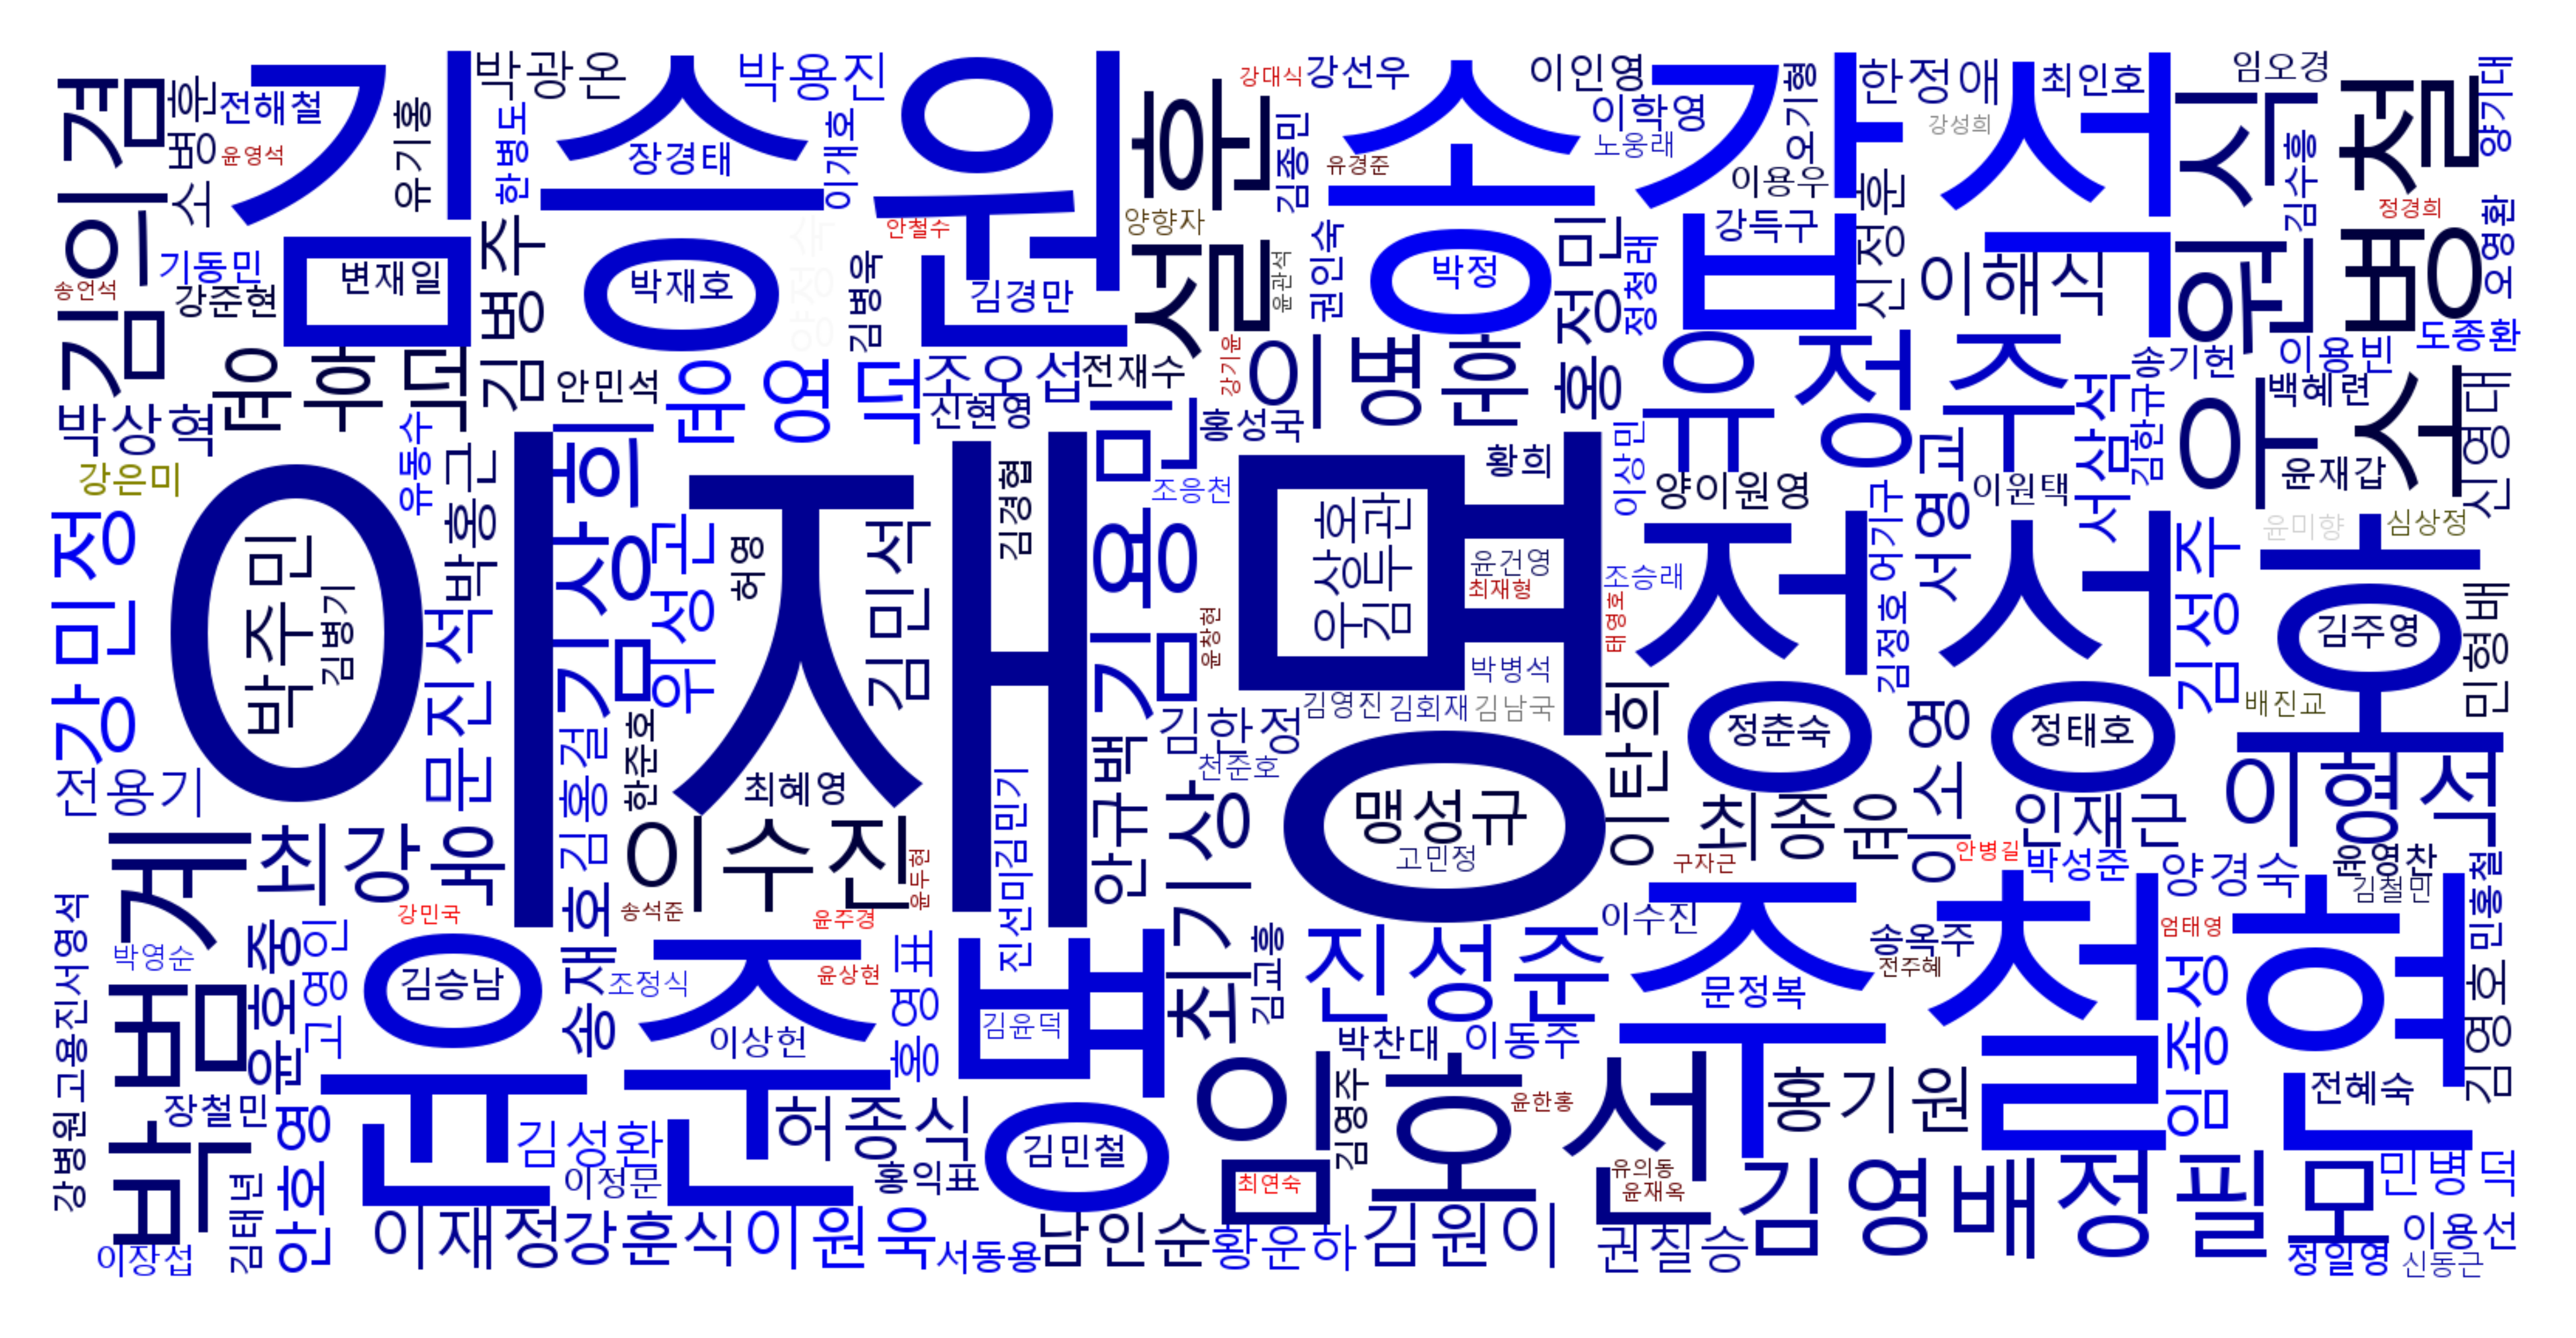

In [159]:
# tags 데이터 전처리
matrix_person = matrix[matrix.index == person]
df['co_count'] = matrix_person.T.values
tags = df.loc[:,['name','co_count']]
tags = tags.set_index('name', drop = True)
tags = tags['co_count']
tags

# 워드클라우드 밑그림
wc = WordCloud(font_path='C:/Windows/Fonts/malgun',background_color="white",width=1600, height=800,random_state = 42)
cloud = wc.generate_from_frequencies(tags)

# 정당에 따라 색칠 다시하기
default_color = 'grey'
grouped_color_func = GroupedColorFunc(color_to_names, default_color)
wc.recolor(color_func=grouped_color_func)

# 사이즈 조정 및 출력
figure(dpi=900)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

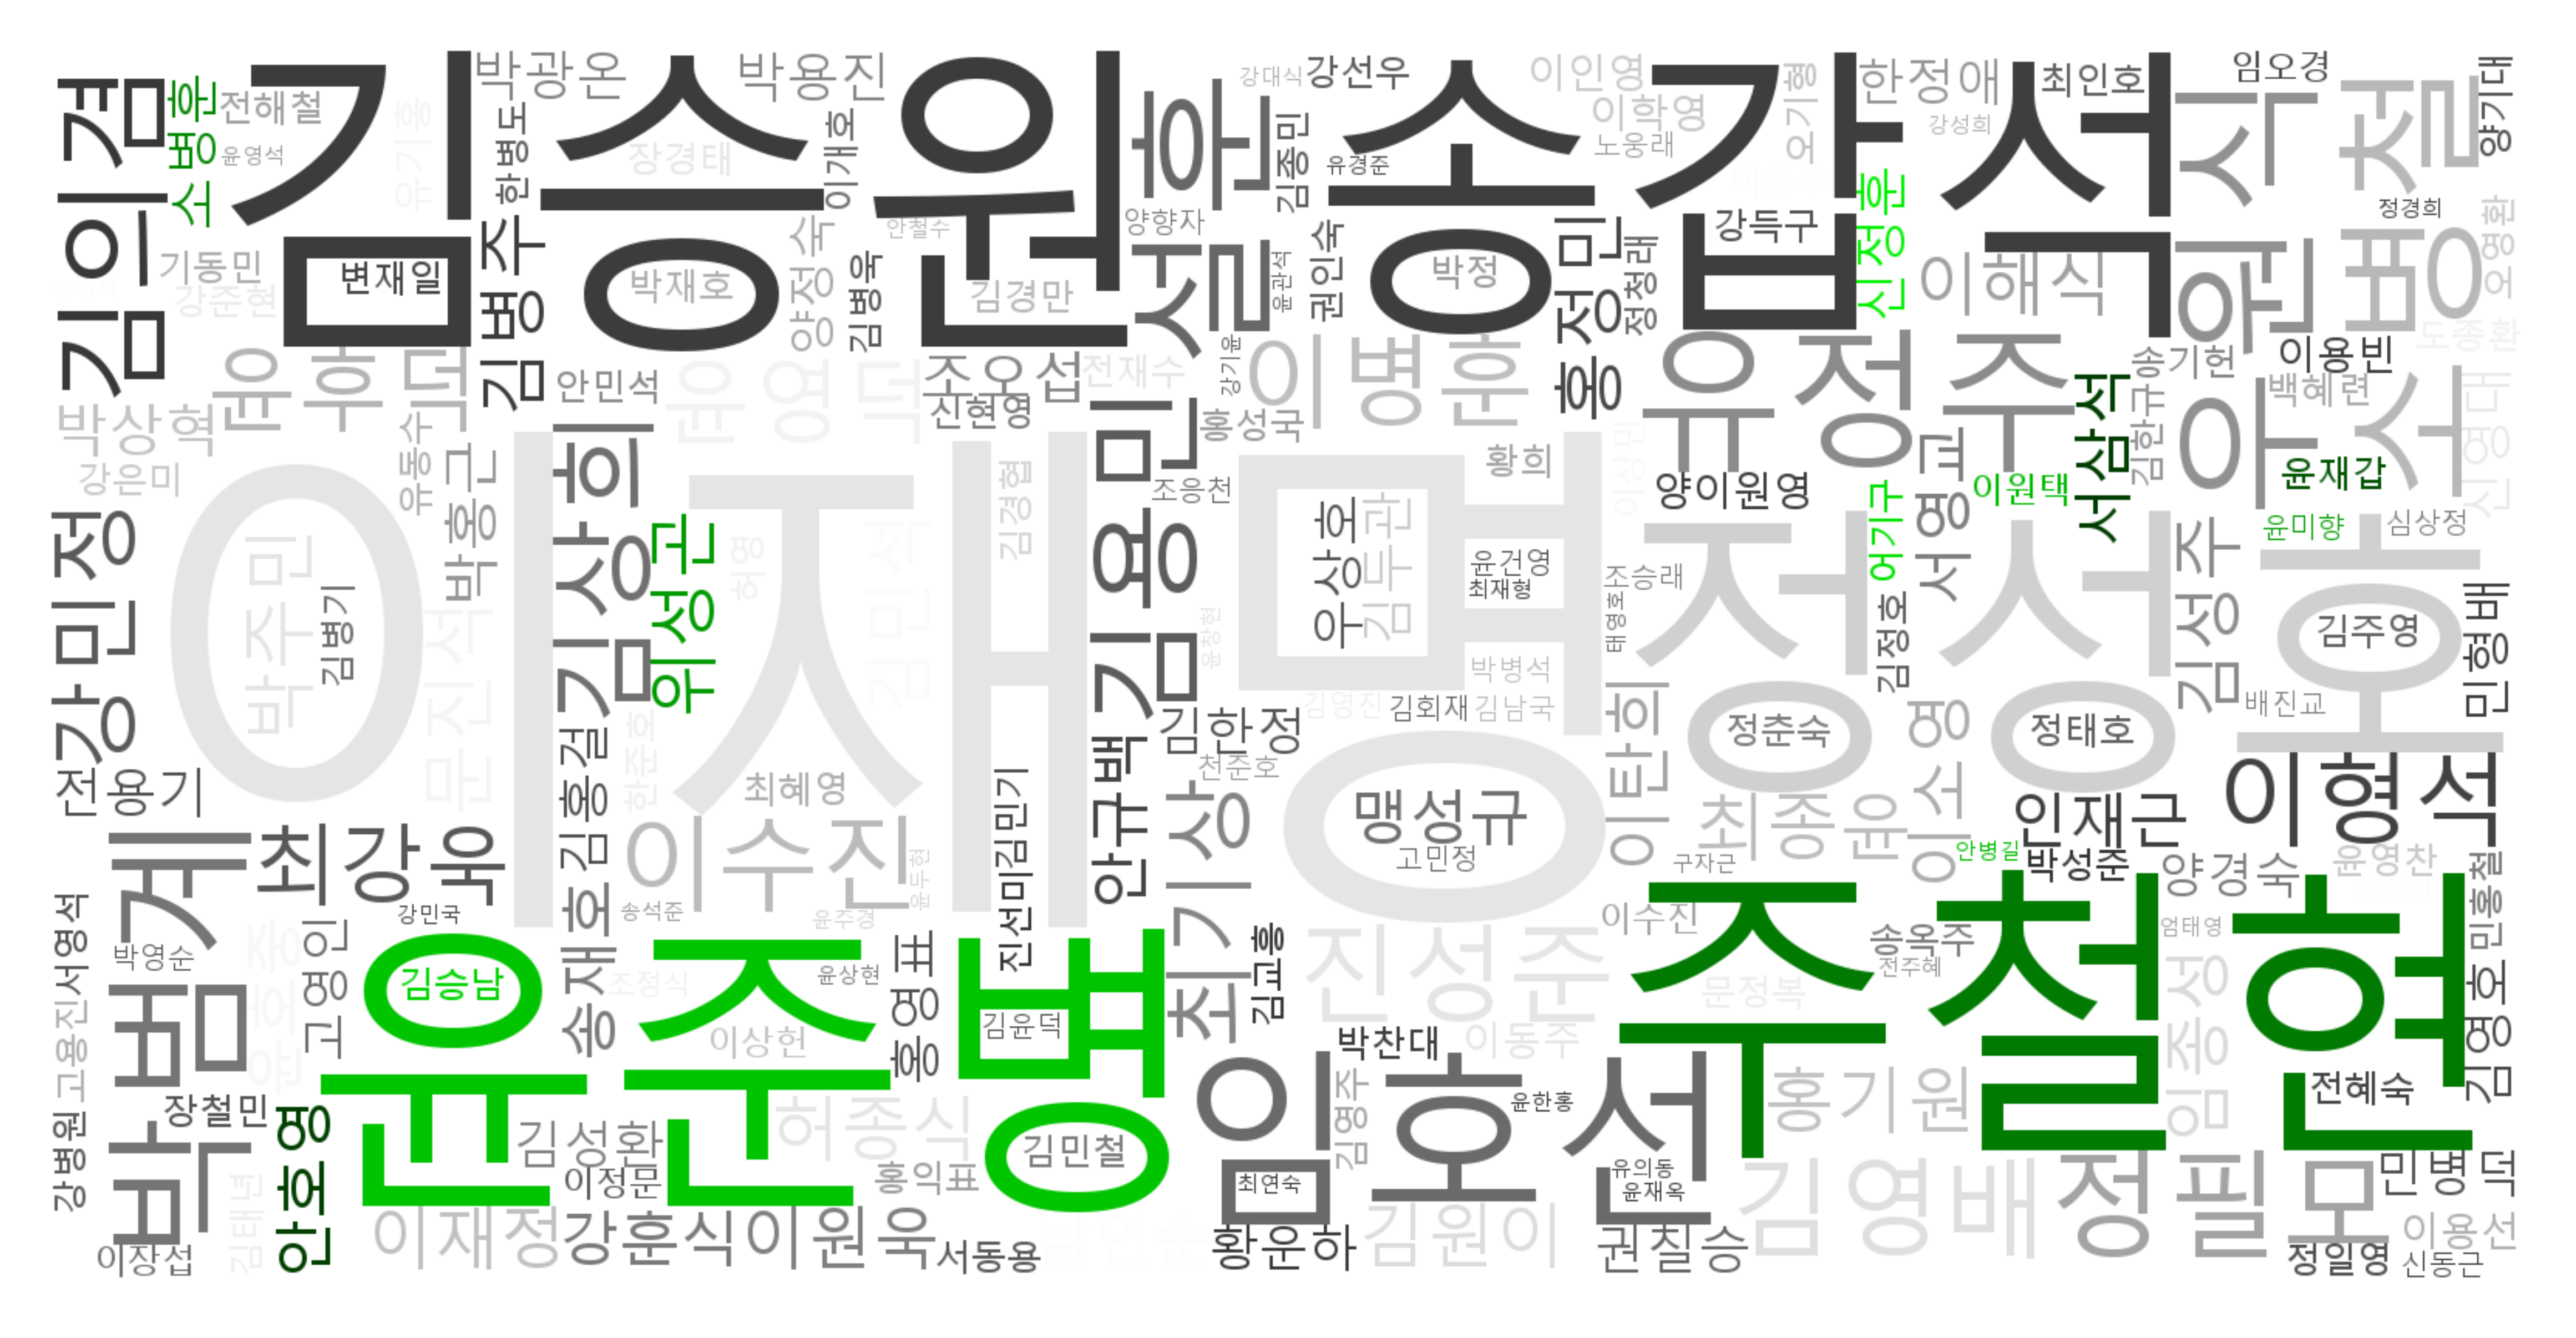

In [165]:
# tags 데이터 전처리
matrix_person = matrix[matrix.index == person]
df['co_count'] = matrix_person.T.values
tags = df.loc[:,['name','co_count']]
tags = tags.set_index('name', drop = True)
tags = tags['co_count']
tags

# 워드클라우드 밑그림
wc = WordCloud(font_path='C:/Windows/Fonts/malgun',background_color="white",width=1600, height=800,random_state = 42)
cloud = wc.generate_from_frequencies(tags)

# 정당에 따라 색칠 다시하기
default_color = 'grey'
grouped_color_func = GroupedColorFunc(color_to_committees, default_color)
wc.recolor(color_func=grouped_color_func)

# 사이즈 조정 및 출력
figure(dpi=900)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
# 핵심 인물 찾기

In [169]:
tmp = '''소병훈
어기구
이달곤
김승남
서삼석
신정훈
안호영
위성곤
윤재갑
윤준병
이원택
주철현
박덕흠
안병길
이양수
정희용
최춘식
홍문표
윤미향'''

In [141]:
afro_committees = tmp.split('\n')

In [174]:
print(list(set(afro_committees)))

['김승남', '윤준병', '홍문표', '신정훈', '최춘식', '윤미향', '이양수', '이달곤', '안호영', '주철현', '위성곤', '어기구', '박덕흠', '안병길', '윤재갑', '소병훈', '이원택', '서삼석', '정희용']


In [41]:
import networkx as nx
from pyvis.network import Network

In [ ]:
person = matrix.index[0]

In [48]:
person

'丁慶姬'

In [39]:
matrix_person = matrix[matrix.index == person]

In [64]:
edge_matrix.T.sort_values(by = person, ascending = False)

丁慶姬
丁慶姬  50.0
李泰珪  21.0
金炳旭  19.0
白宗憲  17.0
徐秉洙  17.0
..    ...
尹官石   0.0
尹建永   0.0
奇東旻   0.0
朴炳錫   0.0
梁貞淑   0.0

[300 rows x 1 columns]

In [69]:
sum(edge_matrix.values[0] == 0)

35

In [82]:
idx

1

In [84]:
edge_matrix.T

丁慶姬  全惠淑  全海澈   全珠惠  兪京濬  兪義東  兪訂炷  具滋根  千俊鎬  南仁順  ...  李鍾成   李鏞  李亮壽  \
丁慶姬  50.0  1.0  1.0  11.0  8.0  5.0  1.0  5.0  0.0  1.0  ...  7.0  9.0  8.0   

     李龍彬  李龍雨  林五卿  林昊宣   林炳憲  林鍾聲  林利子  
丁慶姬  1.0  1.0  1.0  1.0  12.0  1.0  7.0  

[1 rows x 300 columns]

In [88]:
one_mode_matrix = np.array(matrix)

# diagnal 저장 및 수정
diagonal = one_mode_matrix.diagonal().copy()
np.fill_diagonal(one_mode_matrix,0)

# NETWORK 생성
net = Network(notebook=True,select_menu=True, filter_menu=True,  cdn_resources='remote') #  

# 동시발의법안 수로 노트 및 엣쥐너비 설정
edge_matrix = matrix_person.copy()
for idx, count in enumerate(edge_matrix.values[0]):
    net.add_node(idx, size = count,label=list(edge_matrix)[idx],font='{}px arial black'.format(str(count)))
    net.add_edge(0,idx, width = np.sqrt(count))

# SHOW NETWORK
net.show_buttons()

net.show('my.html')

In [ ]:
'''
# 동시발의법안 수를 엣쥐만 살리고 나머지는 0으로 변경

norm =  20 # one_mode_matrix.sum() / (len(one_mode_matrix)*len(one_mode_matrix))
for idx, _ in enumerate(edge_matrix):
    edge_matrix[idx] = np.multiply(edge_matrix[idx],edge_matrix[idx] >= norm)

# 동시발의법안 수로 엣쥐너비 설정
edge_matrix = matrix_person.copy()
for u in range(len(edge_matrix )):
    for v in range(len(edge_matrix )):
        if edge_matrix [u,v] != 0 and u != v:
            net.add_edge(u,v, width = np.sqrt(edge_matrix [u,v]))
'''

In [37]:
# 가장 법률 발의 패턴이 비슷한 순위, 가장 많이 만든 순위

In [38]:
# 시간순으로 (축고정이 이슈일듯)

In [16]:
'''

#%% 클러스터링. 
ac = AgglomerativeClustering(n_clusters = 2,  linkage='average')
labels = ac.fit_predict(distanceMatrixDf)
party = list(map(lambda x : name_party_dict[x][1], matrix.columns))
name = list(map(lambda x : name_party_dict[x][0], matrix.columns))

df = pd.DataFrame({'cluster': labels, 'party':party, 'name':name, 'hanja': matrix.columns})

colors = {'국민의힘':'red', '더불어민주당':'blue','한국의희망':'orange',
          '정의당':'yellow','무소속':'gray','시대전환':'purple','진보당':'green','기본소득당':'skyblue'}
df['color'] = [ colors[x] for x in df.party]


#%% K-elbow
Z = linkage(distanceMatrixDf, 'average')

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]

plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

'''

In [ ]:
'''
## 덴도 그램

leaf_colors = dict(zip(df.name,df.color))

plt.rcParams["figure.figsize"] = (50,30)
dend = dendrogram(linkage(distanceMatrix, method='average'), 
     color_threshold=4, 
     leaf_font_size=9, 
     labels = df.name.tolist())

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(leaf_colors[lbl.get_text()])

plt.show()
'''

In [ ]:
'''
# barchart

bar = df.groupby(['cluster']).party.value_counts().unstack('cluster').fillna(0)
bar = bar / bar.sum(axis=0)
bar = bar.T

bar.plot(kind='bar', stacked=True, color=[colors.get(x, '#333333') for x in bar.columns])
'''